In [1]:
from mflex.load.read_file import read_issi_analytical
import numpy as np
from mflex.plot.plot_magnetogram import (
    plot_fieldlines_issi_analytical,
    plot_fieldlines_grid,
)
from mflex.model.field.bfield_model import (
    magnetic_field,
    magnetic_field_low,
    magfield3d,
)
import scipy
import matplotlib.pyplot as plt
from mflex.model.plasma_parameters import (
    bpressure,
    bdensity,
    btemp,
    deltapres,
    deltaden,
    pres,
    den,
    btemp_linear,
    bpressure_linear,
    bdensity_linear,
    btemp,
)
from mflex.evaluate.metrics import (
    vec_corr_metric,
    cau_Schw_metric,
    norm_vec_err_metric,
    mean_vec_err_metric,
    mag_ener_metric,
    field_div_metric,
    pearson_corr_coeff,
)
from mflex.model.field.utility.height_profile import f_low, f
from mflex.model.field.save import save_field
import matplotlib

--------------------------------------------------
Date: Tue Sep  6 15:16:46 2022
User: xszhu
Host: HR30
--------------------------------------------------
Format: 9
Architecture: x86_64
Operating System: linux
IDL Version: 7.1.1
--------------------------------------------------
Successfully read 33 records of which:
 - 1 are of type NOTICE
 - 29 are of type VARIABLE
 - 1 are of type VERSION
 - 1 are of type TIMESTAMP
--------------------------------------------------
Available variables:
 - b2dx1 [<class 'numpy.ndarray'>]
 - b2dy1 [<class 'numpy.ndarray'>]
 - b2dz1 [<class 'numpy.ndarray'>]
 - d2d1 [<class 'numpy.ndarray'>]
 - b2dx2 [<class 'numpy.ndarray'>]
 - b2dy2 [<class 'numpy.ndarray'>]
 - b2dz2 [<class 'numpy.ndarray'>]
 - d2d2 [<class 'numpy.ndarray'>]
 - b2dx3 [<class 'numpy.ndarray'>]
 - b2dy3 [<class 'numpy.ndarray'>]
 - b2dz3 [<class 'numpy.ndarray'>]
 - d2d3 [<class 'numpy.ndarray'>]
 - b2dx4 [<class 'numpy.ndarray'>]
 - b2dy4 [<class 'numpy.ndarray'>]
 - b2dz4 [<class '

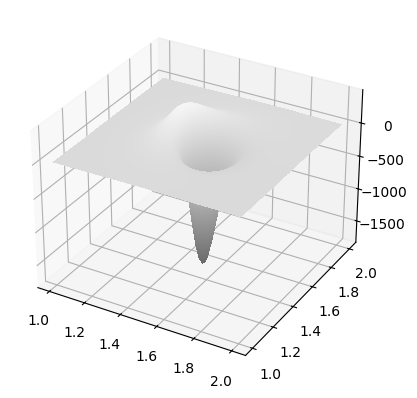

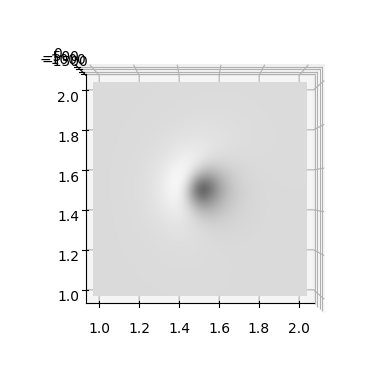

Bz z=0 Maximum 446.3689
Bz z=0 Minimum -1792.2522


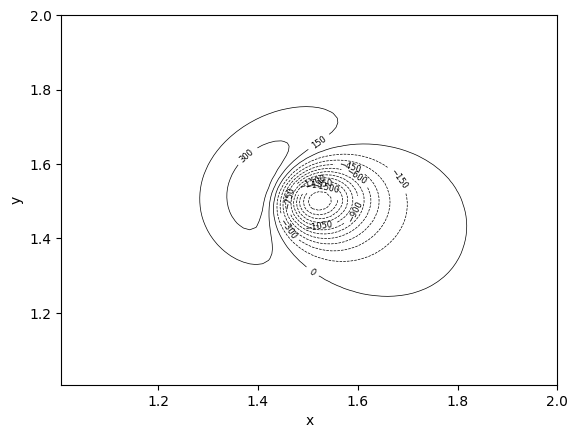

In [2]:
# data = read_issi_analytical("data/Analytic_boundary_data.sav")
cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    "", ["dimgray", "whitesmoke"]
)

L = 1.6
data = read_issi_analytical("data/Analytic_boundary_data.sav", L)
# BFieldvec_Seehafer = np.load('field_data_potential.npy')

data_bx = data.data_x
data_by = data.data_y
data_bz = data.data_z
nresol_x = data.nresol_x
nresol_y = data.nresol_y
nresol_z = data.nresol_z
pixelsize_x = data.pixelsize_x
pixelsize_y = data.pixelsize_y
pixelsize_z = data.pixelsize_z
nf_max = data.nf_max
xmin = data.xmin
xmax = data.xmax
ymin = data.ymin
ymax = data.ymax
zmin = data.zmin
zmax = data.zmax
z0 = data.z0

print(nf_max)

deltaz = z0 / 10.0  # z0 at 2Mm so widht of transition region = 200km
print("z0, deltaz", z0, deltaz)

x_arr = np.arange(2 * nresol_x) * (xmax - xmin) / (2 * nresol_x - 1) + xmin
y_arr = np.arange(2 * nresol_y) * (ymax - ymin) / (2 * nresol_y - 1) + ymin
z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin
x_grid, y_grid = np.meshgrid(x_arr, y_arr)
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.contourf(
    x_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
    y_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
    data_bz,
    1000,
    # offset=0.0,
    cmap=cmap,
)
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/ISSI_analytical_BL1"
plt.savefig(plotname, dpi=300)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.contourf(
    x_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
    y_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
    data_bz,
    1000,
    # offset=0.0,
    cmap=cmap,
)
ax.view_init(90, -90)
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/ISSI_analytical_BL2"
plt.savefig(plotname, dpi=300)
plt.show()

print("Bz z=0 Maximum", data_bz.max())
print("Bz z=0 Minimum", data_bz.min())

fig = plt.figure()
ax = fig.add_subplot(111)
CS = ax.contour(
    x_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
    y_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
    data_bz,
    20,
    colors="k",
    linewidths=0.5,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.clabel(CS, fontsize=6, inline=True)
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/ISSI_analytical_BL3"
plt.savefig(plotname, dpi=300)
plt.show()

In [3]:
t_photosphere = 6000.0
t_corona = 10000.0  # 1.0 * 10.0**6
t_z0 = 10000.0
t0 = (t_photosphere + t_corona * np.tanh(z0 / deltaz)) / (1.0 + np.tanh(z0 / deltaz))
t1 = (t_corona - t_photosphere) / (1.0 + np.tanh(z0 / deltaz))
t0 = t_z0
t1 = t0 - t_photosphere

g_solar = 272.2  # kg/m^3
kB = 1.380649 * 10**-23  # Boltzmann constant in Joule/ Kelvin = kg m^2/(Ks^2)
mbar = 1.67262 * 10**-27  # mean molecular weight (proton mass)
h = (
    kB * t0 / (mbar * g_solar) * 10**-6 / L  # h' = h / L
)  # pressure scale height in normalised length scale (10**-6 to convert to Mm, and L**-1 to convert to normalised length scale)
rho0 = 4.0 * 10**-4  # plasma density at z = 0 in kg/(m^3)
b0 = 1792.2522  # Gauss background magnetic field strength in 10^-4 kg/(s^2A) = 10^-4 T
p0 = t_photosphere * kB * rho0 / mbar  # plasma pressure in kg/(s^2 m)
mu0 = 1.25663706 * 10**-6  # permeability of free space in mkg/(s^2A^2)
pB0 = (b0 * 10**-4) ** 2 / (2 * mu0)  # magnetic pressure b0**2 / 2mu0 in kg/(s^2m)
beta0 = p0 / pB0  # Plasma Beta, ration plasma to magnetic pressure
h_photo = h / t0 * t_photosphere
print(b0, pB0, p0, beta0)

druck = kB / mbar * 6000.0 * rho0
print("druck", druck)

1792.2522 12780.810190353768 19810.582200380242 1.5500255387042794
druck 19810.58220038024


79.0
alpha -0.06075949367088608


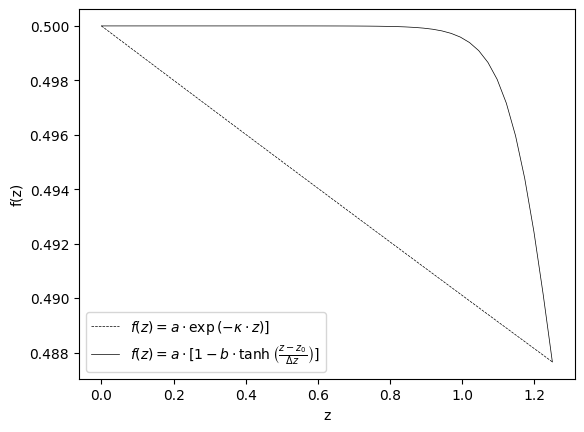

In [4]:
z_arr: np.ndarray[np.float64, np.dtype[np.float64]] = (
    np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin
)

L_issi = nresol_x - 1.0

print(L_issi)
z0_b = z0
deltaz_b = deltaz
f_exp = np.zeros(nresol_z)
f_tanh = np.zeros(nresol_z)
a = 0.5 * np.exp(-0.02 * z0_b)
b = -(0.5 / a - 1.0) / np.tanh(-z0_b / deltaz_b)
alpha = -3.0 / L_issi * L

print("alpha", alpha)

for iz in range(0, nresol_z):
    z = z_arr[iz]
    f_exp[iz] = f_low(z, 0.5, 0.02)
    f_tanh[iz] = f(z, z0_b, deltaz_b, a, b)


plt.plot(
    z_arr,
    f_exp,
    label=r"$f(z) = a \cdot \exp\left(- \kappa \cdot z \right)]$",
    linewidth=0.5,
    color="black",
    linestyle="dashed",
)
plt.plot(
    z_arr,
    f_tanh,
    label=r"$f(z) = a \cdot [1 - b \cdot \tanh\left(\frac{z - z_0}{\Delta z}\right)]$",
    linewidth=0.5,
    color="black",
    linestyle="solid",
)
plt.legend()
plt.xlabel("z")
plt.ylabel("f(z)")
# plotname = "/Users/lilli/Desktop/mflex/nw2019_paper/figure1.png"
# plt.savefig(plotname, dpi=300)
plt.show()

In [5]:
"""bfieldsys, dpartial_bfieldsys = magfield3d(
    data_bz,
    z0_b,
    deltaz_b,
    a,
    b,
    alpha,
    xmin,
    xmax,
    ymin,
    ymax,
    zmin,
    zmax,
    nresol_x,
    nresol_y,
    nresol_z,
    pixelsize_x,
    pixelsize_y,
    nf_max,
    L,
    solution="Asymp",
)

x_arr = np.arange(2 * nresol_x) * (xmax - xmin) / (2 * nresol_x - 1) + xmin
y_arr = np.arange(2 * nresol_y) * (ymax - ymin) / (2 * nresol_y - 1) + ymin
x_grid, y_grid = np.meshgrid(x_arr, y_arr)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.contourf(
    x_grid,
    y_grid,
    bfieldsys[:, :, 0, 2],
    1000,
    cmap="bone",
)
# Have to have Xgrid first, Ygrid second, as Contourf expects x-axis/ columns first, then y-axis/rows
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.view_init(90, -90)
plt.show()"""

'bfieldsys, dpartial_bfieldsys = magfield3d(\n    data_bz,\n    z0_b,\n    deltaz_b,\n    a,\n    b,\n    alpha,\n    xmin,\n    xmax,\n    ymin,\n    ymax,\n    zmin,\n    zmax,\n    nresol_x,\n    nresol_y,\n    nresol_z,\n    pixelsize_x,\n    pixelsize_y,\n    nf_max,\n    L,\n    solution="Asymp",\n)\n\nx_arr = np.arange(2 * nresol_x) * (xmax - xmin) / (2 * nresol_x - 1) + xmin\ny_arr = np.arange(2 * nresol_y) * (ymax - ymin) / (2 * nresol_y - 1) + ymin\nx_grid, y_grid = np.meshgrid(x_arr, y_arr)\n\nfig = plt.figure()\nax = fig.add_subplot(111, projection="3d")\nax.contourf(\n    x_grid,\n    y_grid,\n    bfieldsys[:, :, 0, 2],\n    1000,\n    cmap="bone",\n)\n# Have to have Xgrid first, Ygrid second, as Contourf expects x-axis/ columns first, then y-axis/rows\nax.set_xlabel("x")\nax.set_ylabel("y")\nax.set_zlabel("z")\nax.view_init(90, -90)\nplt.show()'

length scale 3.2
length scale x 6.3999999999999995
length scale y 6.3999999999999995
length scale x norm 1.9999999999999998
length scale y norm 1.9999999999999998
xmin, xmax, ymin, ymax, zmin, zmax  0.0 2.0 0.0 2.0 0.0 1.25
(160, 160, 50, 3)
(160, 160)
(160, 160)


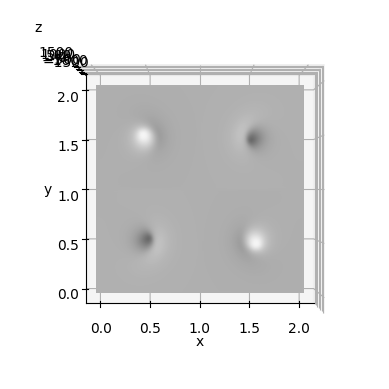

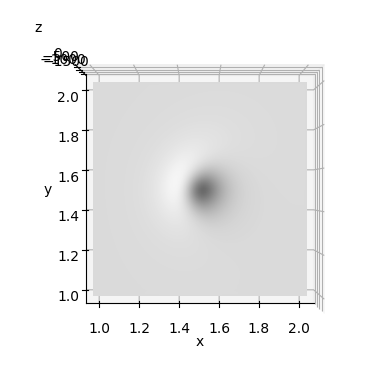

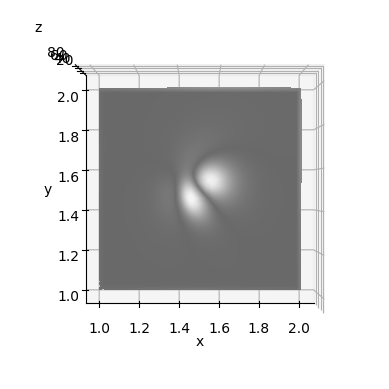

In [6]:
bfield, dpartial_bfield = magnetic_field(
    data_bz,
    z0_b,
    deltaz_b,
    a,
    b,
    alpha,
    xmin,
    xmax,
    ymin,
    ymax,
    zmin,
    zmax,
    nresol_x,
    nresol_y,
    nresol_z,
    pixelsize_x,
    pixelsize_y,
    nf_max,
    L,
)

save_field(
    bfield,
    dpartial_bfield,
    "issi_analytical_" + str(a) + "_" + str(alpha) + "_" + str(b),
)

x_arr = np.arange(2 * nresol_x) * (xmax - xmin) / (2 * nresol_x - 1) + xmin
y_arr = np.arange(2 * nresol_y) * (ymax - ymin) / (2 * nresol_y - 1) + ymin
x_grid, y_grid = np.meshgrid(x_arr, y_arr)

print(bfield.shape)
print(x_grid.shape)
print(y_grid.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.contourf(
    x_grid,
    y_grid,
    bfield[:, :, 0, 2],
    1000,
    cmap=cmap,
)
# Have to have Xgrid first, Ygrid second, as Contourf expects x-axis/ columns first, then y-axis/rows
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.view_init(90, -90)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.contourf(
    x_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
    y_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
    bfield[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, 0, 2],
    1000,
    cmap=cmap,
)
# Have to have Xgrid first, Ygrid second, as Contourf expects x-axis/ columns first, then y-axis/rows
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.view_init(90, -90)
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/ISSI_analytical_BL_reconstructed"
plt.savefig(plotname, dpi=300)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.contourf(
    x_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
    y_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
    abs(data_bz - bfield[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, 0, 2]),
    1000,
    cmap=cmap,
)
# Have to have Xgrid first, Ygrid second, as Contourf expects x-axis/ columns first, then y-axis/rows
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.view_init(90, -90)
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/ISSI_analytical_BL_error"
plt.savefig(plotname, dpi=300)
plt.show()

x_arr = np.arange(nresol_x) * (xmax - xmin) / (nresol_x - 1) + xmin
y_arr = np.arange(nresol_y) * (ymax - ymin) / (nresol_y - 1) + ymin
z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin

--------------------------------------------------
Date: Tue Sep  6 15:11:11 2022
User: xszhu
Host: HR30
--------------------------------------------------
Format: 9
Architecture: x86_64
Operating System: linux
IDL Version: 7.1.1
--------------------------------------------------
Successfully read 12 records of which:
 - 1 are of type NOTICE
 - 8 are of type VARIABLE
 - 1 are of type VERSION
 - 1 are of type TIMESTAMP
--------------------------------------------------
Available variables:
 - b3dx [<class 'numpy.ndarray'>]
 - b3dy [<class 'numpy.ndarray'>]
 - b3dz [<class 'numpy.ndarray'>]
 - p3d [<class 'numpy.ndarray'>]
 - d3d [<class 'numpy.ndarray'>]
 - info_unit [<class 'bytes'>]
 - info_pixel [<class 'bytes'>]
 - info_array [<class 'bytes'>]
--------------------------------------------------
b'b3d, p3d, d3d: magnetic vector (Gauss), plasma pressure (dyn/cm^2), plasma density (g/cm^3)'
b'Pixel spacing: 40km*40km*40km'
b'Array example: d3d(nx,ny,nz)'
data_bx_ref.shape (50, 80, 80)
d

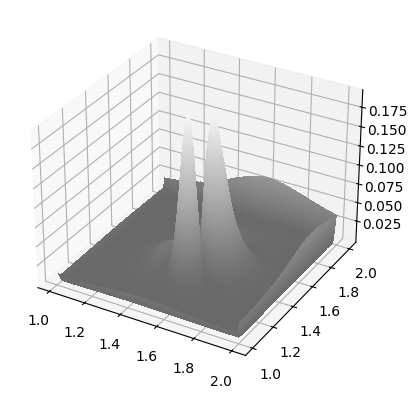

Locator attempting to generate 1001 ticks ([-9.999999999999999e-14, ..., 1e-13]), which exceeds Locator.MAXTICKS (1000).


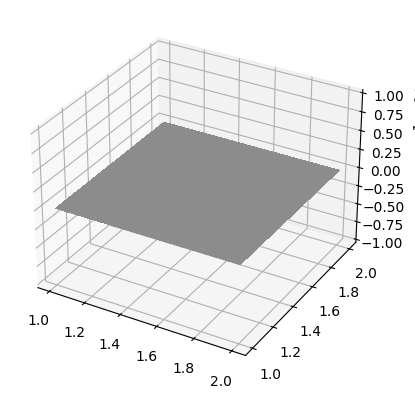

Bz


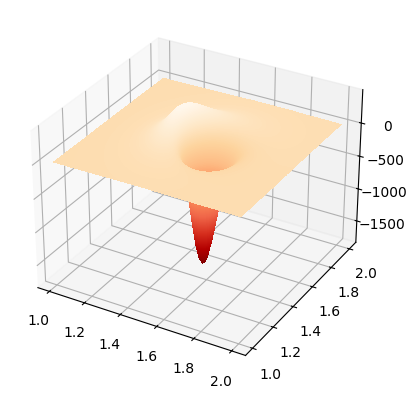

iz 0


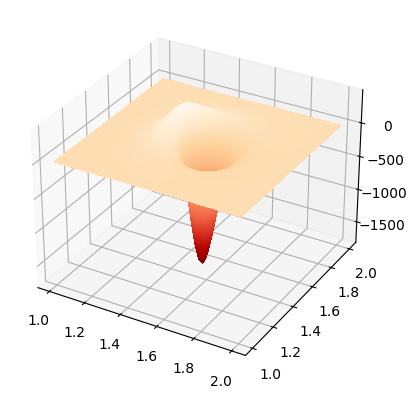

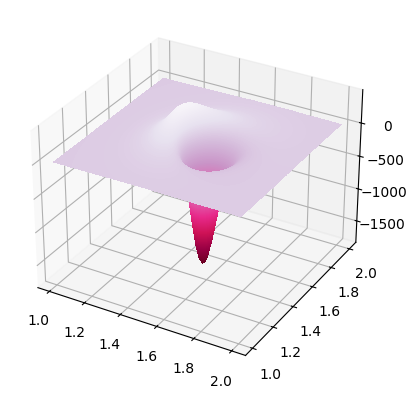

iz 10


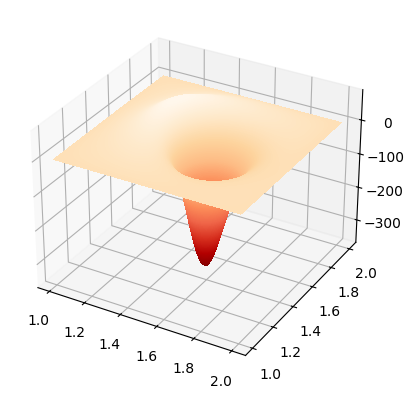

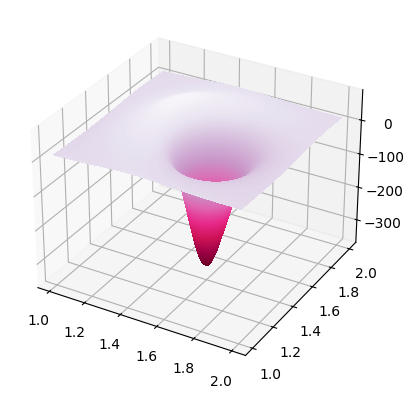

iz 20


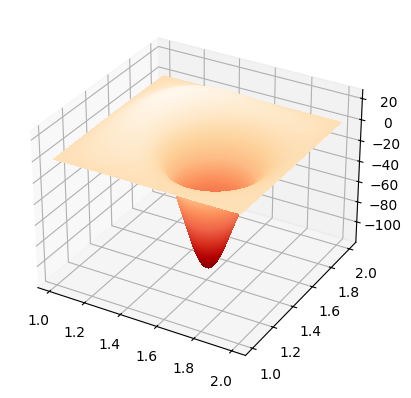

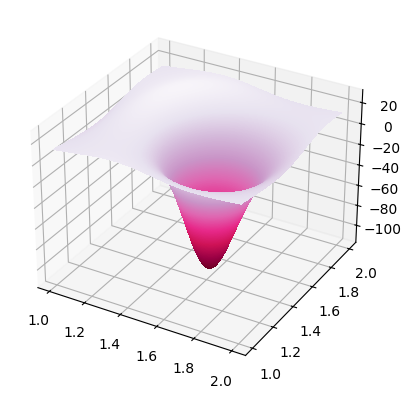

iz 30


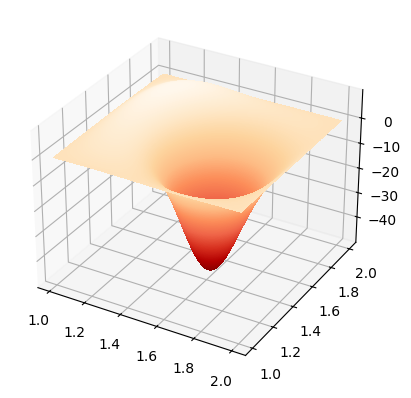

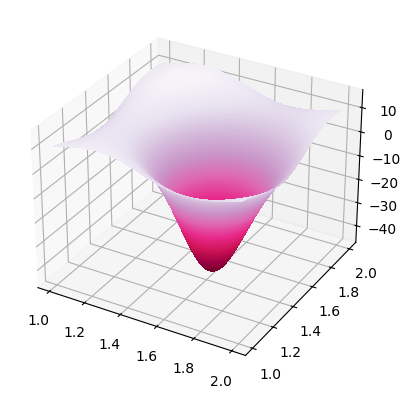

iz 40


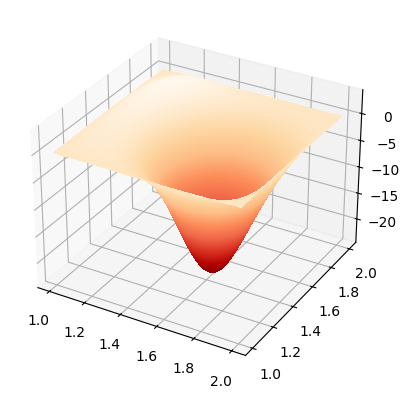

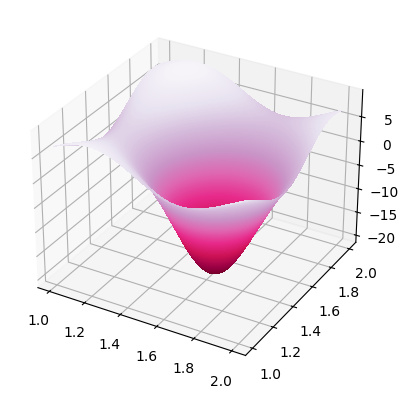

'print("Bx")\n\nfor iz in range(0, nresol_z, 10):\n    print("iz", iz)\n    fig = plt.figure()\n    ax = fig.add_subplot(111, projection="3d")\n    ax.contourf(\n        x_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],\n        y_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],\n        bfield[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iz, 1],\n        1000,\n        #offset=0.0,\n        cmap="OrRd_r",\n    )\n    plt.show()\n\n    fig = plt.figure()\n    ax = fig.add_subplot(111, projection="3d")\n    ax.contourf(\n        x_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],\n        y_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],\n        issi_bx[:, :, iz],\n        1000,\n        #offset=0.0,\n        cmap="PuRd_r",\n    )\n    plt.show()\n\nprint("By")\n\nfor iz in range(0, nresol_z, 10):\n    print("iz", iz)\n    fig = plt.figure()\n    ax = fig.add_subplot(111, projection="3d")\n    ax.contourf(\n        x_grid[nresol_y : 2 * nresol_y, nreso

In [7]:
path3d = "data/Analytic_3D_data.sav"
data3d = scipy.io.readsav(path3d, python_dict=True, verbose=True)

print(data3d["info_unit"])
print(data3d["info_pixel"])
print(data3d["info_array"])

data_bx_ref = data3d["b3dx"]
data_by_ref = data3d["b3dy"]
data_bz_ref = data3d["b3dz"]

pres_3d = data3d["p3d"]
den_3d = data3d["d3d"]

print("data_bx_ref.shape", data_bx_ref.shape)
print("data_by_ref.shape", data_by_ref.shape)
print("data_bz_ref.shape", data_bz_ref.shape)
print("pres_3d.shape", pres_3d.shape)
print("den_3d.shape", den_3d.shape)

bfield_bx = bfield[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, :, 1]
bfield_by = bfield[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, :, 0]
bfield_bz = bfield[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, :, 2]
print(bfield_bx.shape)
print(bfield_by.shape)
print(bfield_bz.shape)

issi_bx = 0.0 * bfield_bx
issi_by = 0.0 * bfield_by
issi_bz = 0.0 * bfield_bz

for i in range(0, nresol_y):
    for j in range(0, nresol_x):
        for k in range(0, nresol_z):
            issi_bx[i, j, k] = data_bx_ref[k, i, j]
            issi_by[i, j, k] = data_by_ref[k, i, j]
            issi_bz[i, j, k] = data_bz_ref[k, i, j]

"""plot_magnetogram_boundary(data_bz, nresol_x, nresol_y)
plot_magnetogram_boundary(bfield[nresol_y:2*nresol_y, nresol_x:2*nresol_x, 0, 2], nresol_x, nresol_y)
plot_magnetogram_boundary(issi_bz[:, :, 0], nresol_x, nresol_y)"""

x_arr = np.arange(2 * nresol_x) * (xmax - xmin) / (2 * nresol_x - 1) + xmin
y_arr = np.arange(2 * nresol_y) * (ymax - ymin) / (2 * nresol_y - 1) + ymin
z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin
x_grid, y_grid = np.meshgrid(x_arr, y_arr)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.contourf(
    x_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
    y_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
    abs(data_bz - bfield[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, 0, 2])
    / abs(data_bz.max()),
    1000,
    cmap=cmap,
)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.contourf(
    x_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
    y_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
    abs(data_bz - issi_bz[:, :, 0]),
    1000,
    offset=0,
    cmap=cmap,
)
plt.show()

"""
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.contourf(
    x_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
    y_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
    bfield[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, 0, 2],
    1000,
    cmap="bone",
)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.contourf(
    x_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
    y_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
    issi_bz[:, :, 0],
    1000,
    cmap="bone",
)
plt.show()"""

print("Bz")

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.contourf(
    x_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
    y_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
    data_bz,
    1000,
    # offset=0.0,
    cmap="OrRd_r",
)
plt.show()

for iz in range(0, nresol_z, 10):

    print("iz", iz)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax.contourf(
        x_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
        y_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
        bfield[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iz, 2],
        1000,
        # offset=0.0,
        cmap="OrRd_r",
    )
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax.contourf(
        x_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
        y_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
        issi_bz[:, :, iz],
        1000,
        # offset=0.0,
        cmap="PuRd_r",
    )
    plt.show()

    """fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax.contourf(
        x_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
        y_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
        abs(
            issi_bz[:, :, iz]
            - bfield[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iz, 2]
        ),
        1000,
        offset=0.0,
        cmap="bone",
    )
    plt.show()"""

"""print("Bx")

for iz in range(0, nresol_z, 10):
    print("iz", iz)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax.contourf(
        x_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
        y_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
        bfield[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iz, 1],
        1000,
        #offset=0.0,
        cmap="OrRd_r",
    )
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax.contourf(
        x_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
        y_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
        issi_bx[:, :, iz],
        1000,
        #offset=0.0,
        cmap="PuRd_r",
    )
    plt.show()

print("By")

for iz in range(0, nresol_z, 10):
    print("iz", iz)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax.contourf(
        x_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
        y_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
        bfield[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, iz, 0],
        1000,
        #offset=0.0,
        cmap="OrRd_r",
    )
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax.contourf(
        x_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
        y_grid[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x],
        issi_by[:, :, iz],
        1000,
        #offset=0.0,
        cmap="PuRd_r",
    )
    plt.show()"""

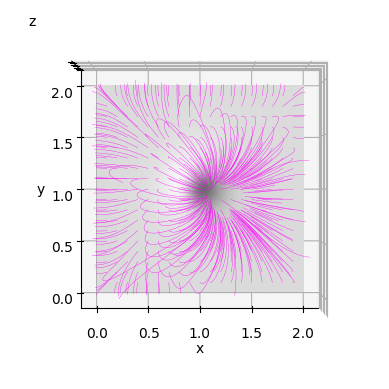

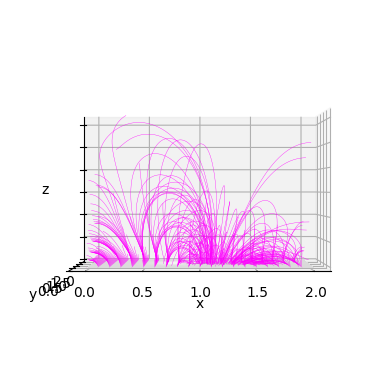

In [8]:
h1 = 0.01  # Initial step length for fieldline3D
eps = 1.0e-8
# Tolerance to which we require point on field line known for fieldline3D
hmin = 0.0  # Minimum step length for fieldline3D
hmax = 1.0  # Maximum step length for fieldline3D

plot_fieldlines_issi_analytical(
    bfield,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    a,
    b,
    alpha,
    stepsize=0.1,
    view="top",
    cmap=cmap,
)

plot_fieldlines_issi_analytical(
    bfield,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    a,
    b,
    alpha,
    stepsize=0.1,
    view="side",
    cmap=cmap,
)

In [9]:
B_rec = np.array((bfield_by, bfield_bx, bfield_bz))
B_ref = np.array((issi_by, issi_bx, issi_bz))

print("Vec Corr", vec_corr_metric(B_ref, B_rec))
print("Ref", vec_corr_metric(B_ref, B_ref))
print("Cau Schw", cau_Schw_metric(B_ref, B_rec))
print("Ref", cau_Schw_metric(B_ref, B_ref))
print("Norm err", norm_vec_err_metric(B_ref, B_rec))
print("Ref", norm_vec_err_metric(B_ref, B_ref))
print("Mean err", mean_vec_err_metric(B_ref, B_rec))
print("Ref", mean_vec_err_metric(B_ref, B_ref))
print("Mag ener", mag_ener_metric(B_ref, B_rec))
print("Ref", mag_ener_metric(B_ref, B_ref))

Vec Corr 0.9697639644160576
Ref 1.0
Cau Schw 0.6215979166666666
Ref 1.0
Norm err 0.3858766256370791
Ref 0.0
Mean err 2.8609090575510003
Ref 0.0
Mag ener 1.341236116518442
Ref 1.0


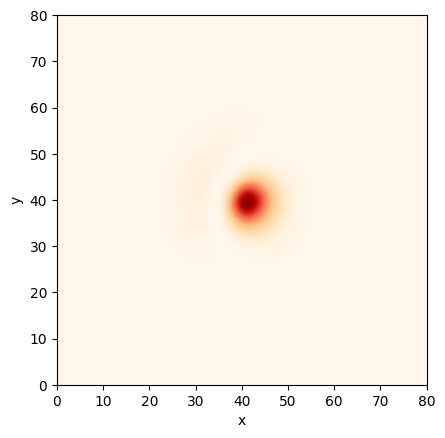

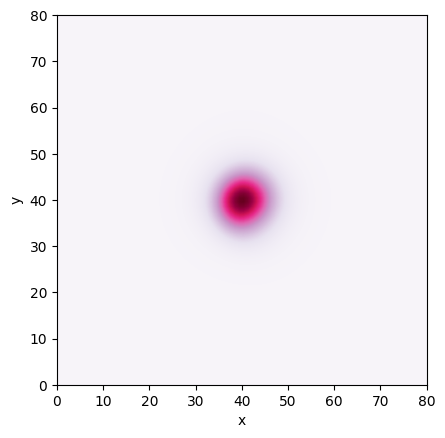

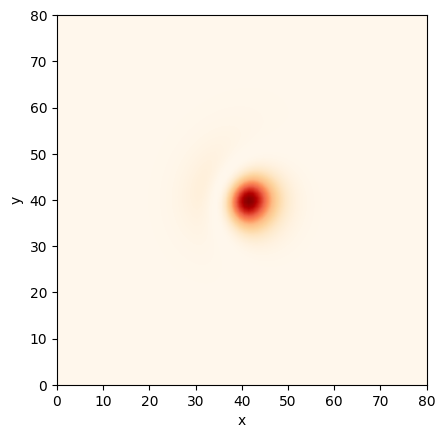

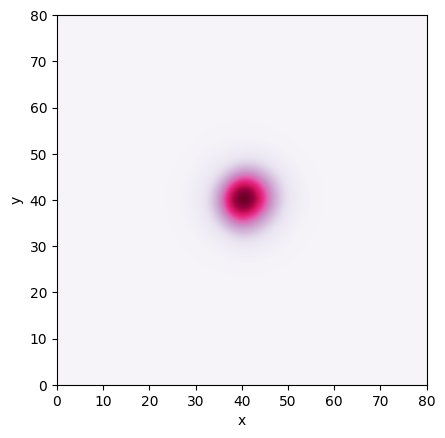

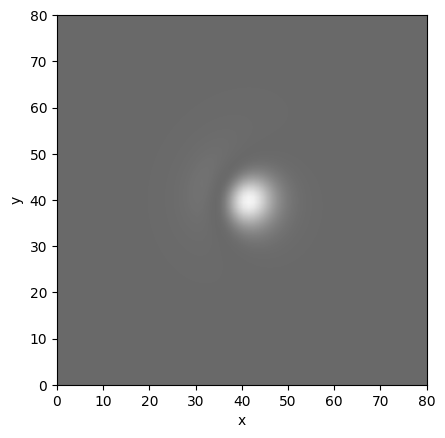

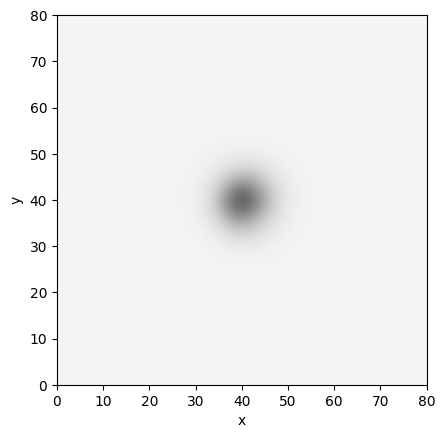

pressure maximal error 114063.51978894438
density maximal error 0.0003997645730661328


In [10]:
x_arr = np.arange(nresol_x) * (nresol_x) / (nresol_x - 1)
y_arr = np.arange(nresol_y) * (nresol_y) / (nresol_y - 1)
x_plot = np.outer(y_arr, np.ones(nresol_x))
y_plot = np.outer(x_arr, np.ones(nresol_y)).T

fpres = np.zeros((nresol_y, nresol_x, int(nresol_z / 4.0)))
fden = np.zeros((nresol_y, nresol_x, int(nresol_z / 4.0)))
fpres_lin = np.zeros((nresol_y, nresol_x, int(nresol_z / 4.0)))
fden_lin = np.zeros((nresol_y, nresol_x, int(nresol_z / 4.0)))

temps = [6000, 5500, 10000]
heights = [0.0, z0 / 4.0, z0]

for iz in range(int(nresol_z / 4.0)):
    for ix in range(nresol_x):
        for iy in range(nresol_y):
            z = z_arr[iz]
            bz = bfield[nresol_y + iy, nresol_x + ix, iz, 2]
            bzdotgradbz = (
                dpartial_bfield[nresol_y + iy, nresol_x + ix, iz, 1]
                * bfield[nresol_y + iy, nresol_x + ix, iz, 1]
                + dpartial_bfield[nresol_y + iy, nresol_x + ix, iz, 0]
                * bfield[nresol_y + iy, nresol_x + ix, iz, 0]
                + dpartial_bfield[nresol_y + iy, nresol_x + ix, iz, 2]
                * bfield[nresol_y + iy, nresol_x + ix, iz, 2]
            )
            fpres[iy, ix, iz] = pres(
                z, z0, deltaz, z0_b, deltaz_b, a, b, beta0, bz, h, t0, t1
            )
            fden[iy, ix, iz] = den(
                z,
                z0,
                deltaz,
                z0_b,
                deltaz_b,
                a,
                b,
                bz,
                bzdotgradbz,
                beta0,
                h,
                t0,
                t1,
                t_photosphere,
            )
            fpres_lin[iy, ix, iz] = (
                b0**2.0
                / mu0
                * 0.5
                * beta0
                * bpressure_linear(z, temps, heights, t0, h)
                * 10**-8
                + deltapres(z, z0_b, deltaz_b, a, b, bz) / mu0 * 10**-8
            )
            fden_lin[iy, ix, iz] = (
                0.5
                * beta0
                / h
                * t0
                / t_photosphere
                * b0**2.0
                / (mu0 * g_solar * L)
                * 10**-14
                * bdensity_linear(z, temps, heights, t0, h, t_photosphere)
                + deltaden(z, z0_b, deltaz_b, a, b, bz, bzdotgradbz)
                / (mu0 * g_solar)
                * 10**-14
            )

fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(y_plot, x_plot, fpres_lin[:, :, 0], 1000, cmap="OrRd_r")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_aspect(1)
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/ISSI_analytical_fp_lin3d"
plt.savefig(plotname, dpi=300)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(y_plot, x_plot, fden_lin[:, :, 0], 1000, cmap="PuRd_r")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_aspect(1)
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/ISSI_analytical_fd_lin3d"
plt.savefig(plotname, dpi=300)
plt.show()

"""fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(y_plot, x_plot, fpres[:, :, 0], 1000, cmap="OrRd_r")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_aspect(1)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(y_plot, x_plot, fden[:, :, 0], 1000, cmap="PuRd_r")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_aspect(1)
plt.show()"""

fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(y_plot, x_plot, pres_3d[0, :, :], 1000, cmap="OrRd_r")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_aspect(1)
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/ISSI_analytical_fp_data3d"
plt.savefig(plotname, dpi=300)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(y_plot, x_plot, den_3d[0, :, :], 1000, cmap="PuRd_r")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_aspect(1)
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/ISSI_analytical_fd_data3d"
plt.savefig(plotname, dpi=300)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(y_plot, x_plot, fpres_lin[:, :, 0] - pres_3d[0, :, :], 1000, cmap=cmap)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_aspect(1)
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/ISSI_analytical_fp_error3d"
plt.savefig(plotname, dpi=300)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(y_plot, x_plot, fden_lin[:, :, 0] - den_3d[0, :, :], 1000, cmap=cmap)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_aspect(1)
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/ISSI_analytical_fd_error3d"
plt.savefig(plotname, dpi=300)
plt.show()

error_pres = abs(fpres_lin[:, :, 0] - pres_3d[0, :, :])
error_den = abs(fden_lin[:, :, 0] - den_3d[0, :, :])
print("pressure maximal error", error_pres.max())
print("density maximal error", error_den.max())

Pressure minimum lin 1.5119974486852608
Pressure minimum lin 49
Density minimum lin 1.6501604175104587e-08
Density minimum lin 49
Pressure minimum issi 0.511346435546875
Pressure minimum issi 49
Density minimum issi 5.75081779072284e-09
Density minimum issi 49


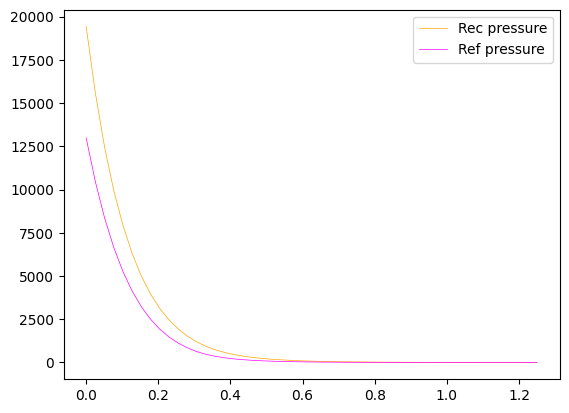

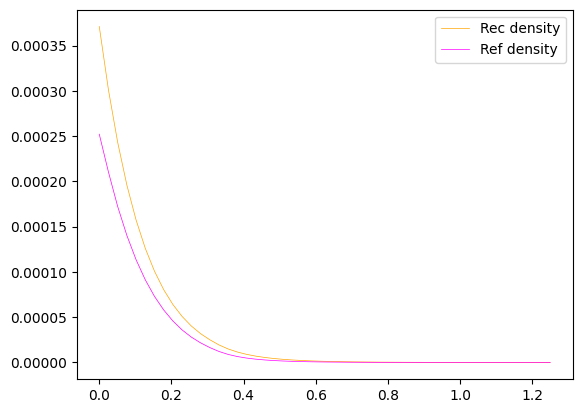

12990.553906250001
19427.082716690045
0.0002521350097595132
0.0003710969966899252


In [11]:
b_back = np.zeros((2 * nresol_y, 2 * nresol_x))
b_back = bfield[:, :, 0, 2]

b_back_small = b_back[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x]
maxcoord = np.unravel_index(
    np.argmax(b_back_small, axis=None),
    b_back_small.shape,
)
iy = int(maxcoord[0])
ix = int(maxcoord[1])

dpres = 0.0 * z_arr
dden = 0.0 * z_arr
fpres = 0.0 * z_arr
fden = 0.0 * z_arr
btemp_lin = 0.0 * z_arr
btemp_orig = 0.0 * z_arr
ffunc = 0.0 * z_arr
fpres_lin = 0.0 * z_arr
fden_lin = 0.0 * z_arr

fpres_issi = 0.0 * z_arr
fden_issi = 0.0 * z_arr

bpres = 0.0 * z_arr
bden = 0.0 * z_arr
bpres_lin = 0.0 * z_arr
bden_lin = 0.0 * z_arr

for iz in range(nresol_z):
    z = z_arr[iz]
    bz = bfield[nresol_y + iy, nresol_x + ix, iz, 2]
    # print(iz, bz)
    bzdotgradbz = (
        dpartial_bfield[nresol_y + iy, nresol_x + ix, iz, 1]
        * bfield[nresol_y + iy, nresol_x + ix, iz, 1]
        + dpartial_bfield[nresol_y + iy, nresol_x + ix, iz, 0]
        * bfield[nresol_y + iy, nresol_x + ix, iz, 0]
        + dpartial_bfield[nresol_y + iy, nresol_x + ix, iz, 2]
        * bfield[nresol_y + iy, nresol_x + ix, iz, 2]
    )

    dpres[iz] = deltapres(z, z0_b, deltaz_b, a, b, bz)
    dden[iz] = deltaden(z, z0_b, deltaz_b, a, b, bz, bzdotgradbz)
    fpres[iz] = pres(z, z0, deltaz, z0_b, deltaz_b, a, b, beta0, bz, h, t0, t1)
    fden[iz] = den(
        z,
        z0,
        deltaz,
        z0_b,
        deltaz_b,
        a,
        b,
        bz,
        bzdotgradbz,
        beta0,
        h,
        t0,
        t1,
        t_photosphere,
    )
    fpres_issi[iz] = pres_3d[iz, iy, ix]
    fden_issi[iz] = den_3d[iz, iy, ix]
    btemp_lin[iz] = btemp_linear(z, temps, heights)
    btemp_orig[iz] = btemp(z, z0, deltaz, t0, t1)
    bpres[iz] = bpressure(z, z0, deltaz, h, t0, t1)
    bden[iz] = bdensity(z, z0, deltaz, h, t0, t1)
    bpres_lin[iz] = bpressure_linear(z, temps, heights, t0, h)
    bden_lin[iz] = bdensity_linear(z, temps, heights, t0, h, t_photosphere)
    # ffunc[iz] = f(z, z0, deltaz, a, b) * bz**2.0 / 2.0

fpres_lin = b0**2.0 / mu0 * 0.5 * beta0 * bpres_lin * 10**-8 + dpres / mu0 * 10**-8
fden_lin = (
    0.5
    * beta0
    / h
    * t0
    / t_photosphere
    * b0**2.0
    / (mu0 * g_solar * L)
    * bden_lin
    * 10**-14
    + dden / (mu0 * g_solar) * 10**-14
)

"""plt.plot(z_arr, dpres, linewidth=0.5, color="black")
plt.plot(z_arr, -0.5 * beta0 * backpres_lin, linewidth=0.5, color="blue")
plt.plot(z_arr, -0.5 * beta0 * backpres, linewidth=0.5, color="red")
plt.show()

plt.plot(z_arr, dden, linewidth=0.5, color="black")
plt.plot(
    z_arr,
    -0.5 * beta0 / h * t0 / t_photosphere * backden_lin,
    linewidth=0.5,
    color="blue",
)
plt.plot(
    z_arr,
    -0.5 * beta0 / h * t0 / t_photosphere * backden,
    linewidth=0.5,
    color="red",
)
plt.show()"""

print("Pressure minimum lin", fpres_lin.min())
print("Pressure minimum lin", fpres_lin.argmin())
print("Density minimum lin", fden_lin.min())
print("Density minimum lin", fden_lin.argmin())

print("Pressure minimum issi", fpres_issi.min() * 10**-1)
print("Pressure minimum issi", fpres_issi.argmin())
print("Density minimum issi", fden_issi.min() * 10**3)
print("Density minimum issi", fden_issi.argmin())

"""plt.plot(z_arr, abs(dden), linewidth=0.5, color="black", linestyle="solid")
plt.plot(z_arr, abs(dpres), linewidth=0.5, color="blue", linestyle="solid")
# plt.axvline(x=z0, color="black", linestyle="solid", linewidth=0.25)
# plt.legend()
plt.xlabel("z")
plt.yscale("log")
# plt.ylim([10**-20, 0.0])
# plt.xlim([0.4, 0.6])
# plotname = "/Users/lilli/Desktop/mflex/nw2019_paper/figure9b.png"
# plt.savefig(plotname, dpi=300)
plt.show()"""

# plt.plot(z_arr, fpres_lin, linewidth=0.5, color="blue")
plt.plot(
    z_arr,
    b0**2.0 / mu0 * 0.5 * beta0 * bpres_lin * 10**-8 + dpres / mu0 * 10**-8,
    linewidth=0.5,
    color="orange",
    label="Rec pressure",
)
plt.plot(
    z_arr, fpres_issi * 10**-1, linewidth=0.5, color="magenta", label="Ref pressure"
)
plt.legend()
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/ISSI_analytical_fp_maxB"
plt.savefig(plotname, dpi=300)
plt.show()

# plt.plot(z_arr, fden_lin, linewidth=0.5, color="blue")
plt.plot(
    z_arr,
    0.5
    * beta0
    / h
    * t0
    / t_photosphere
    * b0**2.0
    / (mu0 * g_solar * L)
    * bden_lin
    * 10**-14
    + dden / (mu0 * g_solar) * 10**-14,
    linewidth=0.5,
    color="orange",
    label="Rec density",
)
plt.plot(z_arr, fden_issi * 10**3, linewidth=0.5, color="magenta", label="Ref density")
plt.legend()
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/ISSI_analytical_fd_maxB"
plt.savefig(plotname, dpi=300)
plt.show()

print(fpres_issi[0] * 10**-1)
print(b0**2.0 / mu0 * 0.5 * beta0 * bpres_lin[0] * 10**-8 + dpres[0] / mu0 * 10**-8)

print(fden_issi[0] * 10**3)
print(
    0.5
    * beta0
    / h
    * t0
    / t_photosphere
    * b0**2.0
    / (mu0 * g_solar * L)
    * bden_lin[0]
    * 10**-14
    + dden[0] / (mu0 * g_solar) * 10**-14
)

(160, 160, 50, 3)
(3, 80, 80, 50)


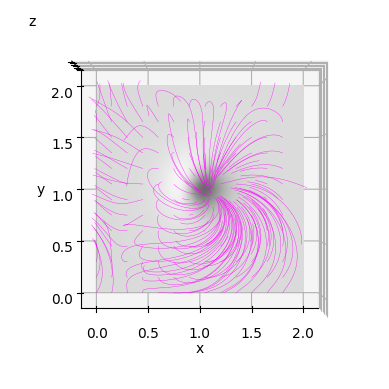

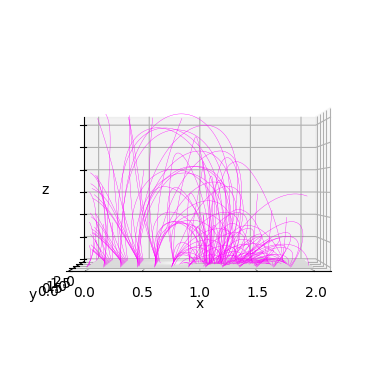

/Users/lilli/Desktop/mflex/mflex/evaluate/metrics.py:248: RuntimeWarning: divide by zero encountered in scalar divide
  temp = num / div


Field line 0.1675


/Users/lilli/Desktop/mflex/mflex/evaluate/metrics.py:248: RuntimeWarning: invalid value encountered in scalar divide
  temp = num / div


Ref 0.6775


In [17]:
B_ref_See = 0.0 * bfield
print(B_ref_See.shape)
print(B_ref.shape)

for iz in range(0, nresol_z):
    for ix in range(0, nresol_x):
        for iy in range(0, nresol_y):
            for id in range(0, 3):
                B_ref_See[nresol_y + iy, nresol_x + ix, iz, id] = B_ref[id, iy, ix, iz]
                B_ref_See[nresol_y + iy, ix, iz, id] = -B_ref[
                    id, iy, nresol_x - 1 - ix, iz
                ]
                B_ref_See[iy, nresol_x + ix, iz, id] = -B_ref[
                    id, nresol_y - 1 - iy, ix, iz
                ]
                B_ref_See[iy, ix, iz, id] = B_ref[
                    id, nresol_y - 1 - iy, nresol_x - 1 - ix, iz
                ]

plot_fieldlines_issi_analytical(
    B_ref_See,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    a,
    b,
    alpha,
    stepsize=0.15,
    view="top",
    cmap=cmap,
)

plot_fieldlines_issi_analytical(
    B_ref_See,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    a,
    b,
    alpha,
    stepsize=0.15,
    view="side",
    cmap=cmap,
)

print(
    "Field line",
    field_div_metric(
        B_ref_See,
        bfield,
        h1,
        hmin,
        hmax,
        eps,
        nresol_x,
        nresol_y,
        nresol_z,
        -xmax,
        xmax,
        -ymax,
        ymax,
        zmin,
        zmax,
        stepsize=0.1,
    ),
)
print(
    "Ref",
    field_div_metric(
        B_ref_See,
        B_ref_See,
        h1,
        hmin,
        hmax,
        eps,
        nresol_x,
        nresol_y,
        nresol_z,
        -xmax,
        xmax,
        -ymax,
        ymax,
        zmin,
        zmax,
        stepsize=0.1,
    ),
)

Pressure minimum lin 1.214957133847857
Pressure minimum lin 316528
Density minimum lin 1.2526613594192318e-08
Density minimum lin 316527
Pressure minimum lin ref 0.43188784
Pressure minimum lin ref 316449
Density minimum lin ref 4.975967e-09
Density minimum lin ref 316528


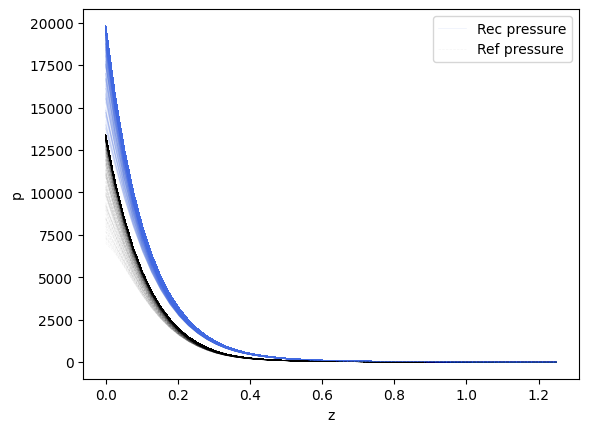

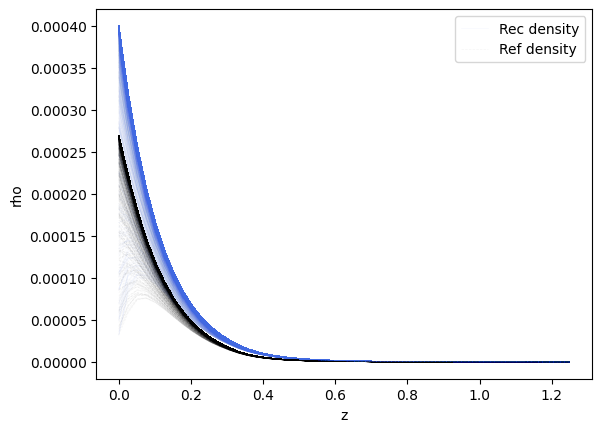

Pearson Ref Pres PearsonRResult(statistic=1.0, pvalue=0.0)
Pearson Ref Den PearsonRResult(statistic=0.9999999999999968, pvalue=0.0)
Pearson Pres PearsonRResult(statistic=0.9980648835924145, pvalue=0.0)
Pearson Den PearsonRResult(statistic=0.9962713335674931, pvalue=0.0)


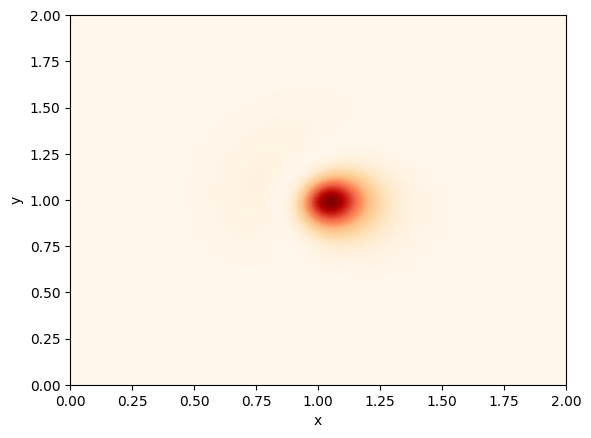

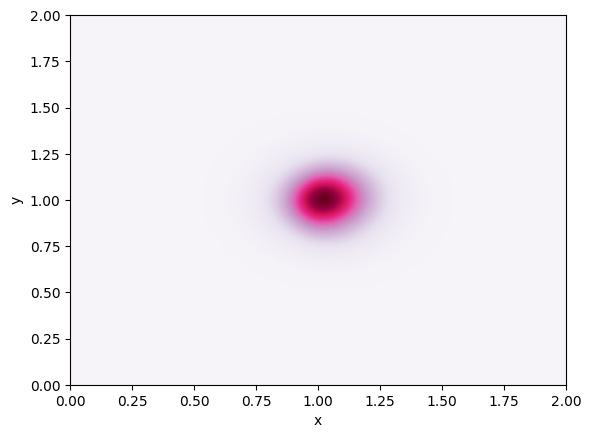

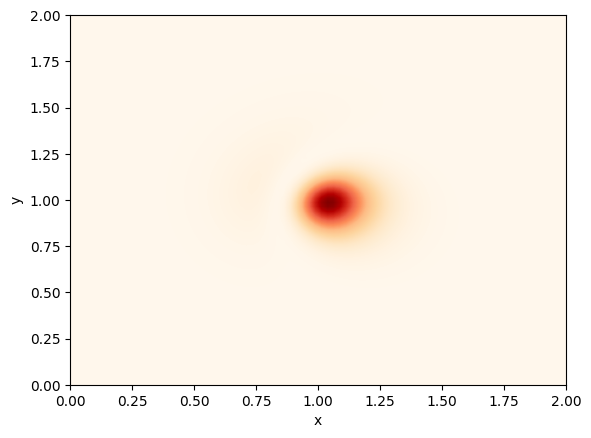

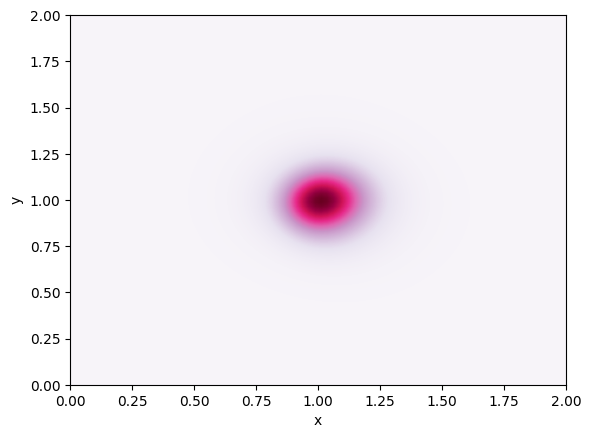

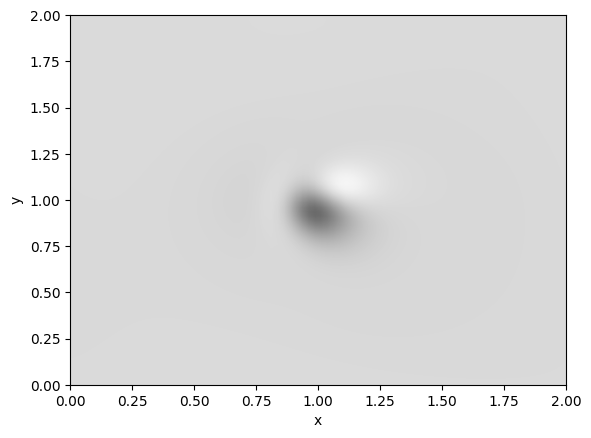

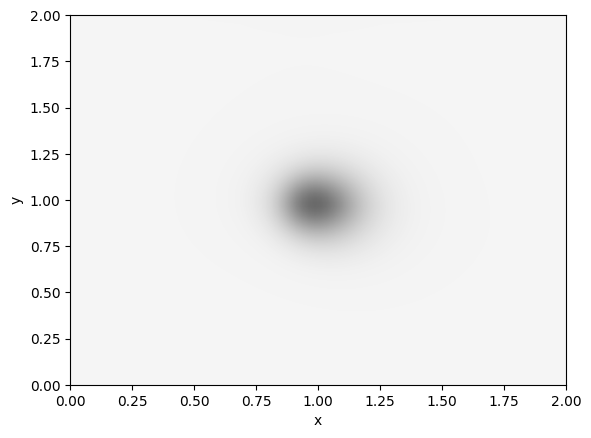

Max diff p 792.0973232504534
Max diff d 1.4022166654295015e-05


In [15]:
fpres_lin3d = np.zeros((nresol_z, nresol_y, nresol_x))
fden_lin3d = np.zeros((nresol_z, nresol_y, nresol_x))

pres_3d = data3d["p3d"] * 10**-1
den_3d = data3d["d3d"]  * 10**3

for ix in range(nresol_x):
    for iy in range(nresol_y):
        for iz in range(nresol_z):
            z = z_arr[iz]
            bz = bfield[nresol_y + iy, nresol_x + ix, iz, 2]
            bzdotgradbz = (
                dpartial_bfield[nresol_y + iy, nresol_x + ix, iz, 1]
                * bfield[nresol_y + iy, nresol_x + ix, iz, 1]
                + dpartial_bfield[nresol_y + iy, nresol_x + ix, iz, 0]
                * bfield[nresol_y + iy, nresol_x + ix, iz, 0]
                + dpartial_bfield[nresol_y + iy, nresol_x + ix, iz, 2]
                * bfield[nresol_y + iy, nresol_x + ix, iz, 2]
            )
            fpres_lin3d[iz, iy, ix] = (
                b0**2.0
                / mu0
                * 0.5
                * beta0
                * bpressure_linear(z, temps, heights, t0, h)
                * 10**-8
                + deltapres(z, z0_b, deltaz_b, a, b, bz) / mu0 * 10**-8
            )
            fden_lin3d[iz, iy, ix] = (
                0.5
                * beta0
                / h
                * t0
                / t_photosphere
                * b0**2.0
                / (mu0 * g_solar * L)
                * bdensity_linear(z, temps, heights, t0, h, t_photosphere)
                * 10**-14
                + deltaden(z, z0_b, deltaz_b, a, b, bz, bzdotgradbz)
                / (mu0 * g_solar)
                * 10**-14
            )

print("Pressure minimum lin", fpres_lin3d.min())
print("Pressure minimum lin", fpres_lin3d.argmin())
print("Density minimum lin", fden_lin3d.min())
print("Density minimum lin", fden_lin3d.argmin())

print("Pressure minimum lin ref", pres_3d.min())
print("Pressure minimum lin ref", pres_3d.argmin())
print("Density minimum lin ref", den_3d.min())
print("Density minimum lin ref", den_3d.argmin())

plt.plot(
    z_arr, fpres_lin3d[:, 0,0], linewidth=0.5, color="royalblue", alpha=0.1, label="Rec pressure"
)
plt.plot(
    z_arr, pres_3d[:, 0,0], linewidth=0.5, color="black", linestyle="dashed", alpha=0.04, label="Ref pressure"
)
for ix in range(0, nresol_x, 1):
    for iy in range(0, nresol_y, 1):
        plt.plot(
            z_arr, fpres_lin3d[:, iy, ix], linewidth=0.5, color="royalblue", alpha=0.1
        )
        plt.plot(
            z_arr, pres_3d[:, iy, ix], linewidth=0.5, color="black", linestyle="dashed", alpha=0.04
        )
plt.ylabel("p")
plt.xlabel("z")
plt.legend()
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/ISSI_analytical_fp_xy"
plt.savefig(plotname, dpi=300)
plt.show()

plt.plot(z_arr, fden_lin3d[:, 0, 0], linewidth=0.5, color="royalblue", alpha=0.04, label="Rec density")
plt.plot(z_arr, den_3d[:, 0, 0], linewidth=0.5, color="black", linestyle="dashed", alpha=0.04, label="Ref density")
for ix in range(0, nresol_x, 1):
    for iy in range(0, nresol_y, 1):
        plt.plot(z_arr, fden_lin3d[:, iy, ix], linewidth=0.5, color="royalblue", alpha=0.04)
        plt.plot(z_arr, den_3d[:, iy, ix], linewidth=0.5, color="black", linestyle="dashed", alpha=0.04)
plt.ylabel("rho")
plt.xlabel("z")
plt.legend()
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/ISSI_analytical_fd_xy"
plt.savefig(plotname, dpi=300)
plt.show()

x_arr = np.arange(nresol_x) * (xmax - xmin) / (nresol_x - 1) + xmin
y_arr = np.arange(nresol_y) * (ymax - ymin) / (nresol_y - 1) + ymin
z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin

x_plot = np.outer(y_arr, np.ones(nresol_x))
y_plot = np.outer(x_arr, np.ones(nresol_y)).T

pres_surface_ref, den_surface_ref, pres_surface_rec, den_surface_rec = (
    pearson_corr_coeff(
        pres_3d,
        den_3d,
        fpres_lin3d,
        fden_lin3d,
        nresol_x,
        nresol_y,
        nresol_z,
        zmin,
        zmax,
    )
)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(y_plot, x_plot, pres_surface_ref, 1000, cmap="OrRd_r")
ax.set_xlabel("x")
ax.set_ylabel("y")
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/ISSI_analytical_fp_ref_los"
plt.savefig(plotname, dpi=300)
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(y_plot, x_plot, den_surface_ref, 1000, cmap="PuRd_r")
ax.set_xlabel("x")
ax.set_ylabel("y")
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/ISSI_analytical_fd_ref_lo"
plt.savefig(plotname, dpi=300)
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(y_plot, x_plot, pres_surface_rec, 1000, cmap="OrRd_r")
ax.set_xlabel("x")
ax.set_ylabel("y")
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/ISSI_analytical_fp_rec_los"
plt.savefig(plotname, dpi=300)
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(y_plot, x_plot, den_surface_rec, 1000, cmap="PuRd_r")
ax.set_xlabel("x")
ax.set_ylabel("y")
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/ISSI_analytical_fd_rec_los"
plt.savefig(plotname, dpi=300)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(y_plot, x_plot, abs(pres_surface_rec - pres_surface_ref), 1000, cmap=cmap)
ax.set_xlabel("x")
ax.set_ylabel("y")
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/ISSI_analytical_fp_los_error"
plt.savefig(plotname, dpi=300)
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(y_plot, x_plot, abs(den_surface_rec - den_surface_ref), 1000, cmap=cmap)
ax.set_xlabel("x")
ax.set_ylabel("y")
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/ISSI_analytical_fd_los_error"
plt.savefig(plotname, dpi=300)
plt.show()

error_d = abs(den_surface_rec - den_surface_ref)
error_p = abs(pres_surface_rec - pres_surface_ref)

print("Max diff p", error_p.max())
print("Max diff d", error_d.max())

length scale 3.2
length scale x 6.3999999999999995
length scale y 6.3999999999999995
length scale x norm 1.9999999999999998
length scale y norm 1.9999999999999998


Locator attempting to generate 1001 ticks ([-9.999999999999999e-14, ..., 1e-13]), which exceeds Locator.MAXTICKS (1000).


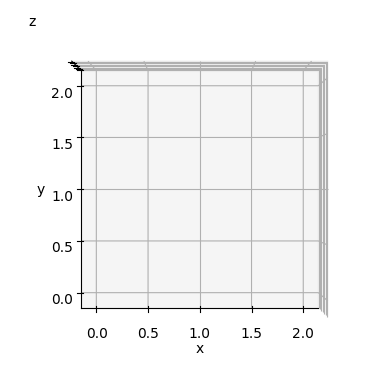

Locator attempting to generate 1001 ticks ([-9.999999999999999e-14, ..., 1e-13]), which exceeds Locator.MAXTICKS (1000).


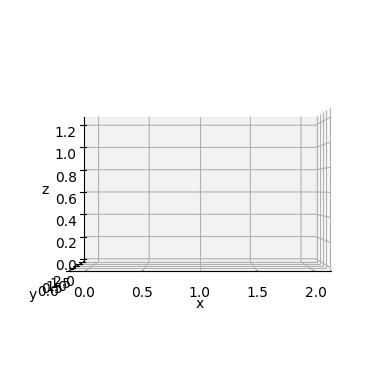

In [15]:
bfield_low, dpartial_bfield_low = magnetic_field_low(
    data_bz,
    z0_b,
    0.02,
    0.5,
    1.0,
    -3.0,
    xmin,
    xmax,
    ymin,
    ymax,
    zmin,
    zmax,
    nresol_x,
    nresol_y,
    nresol_z,
    pixelsize_x,
    pixelsize_y,
    nf_max,
    1.6,
)

plot_fieldlines_issi_analytical(
    bfield_low,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    0.5,
    b,
    -1.5,
    stepsize=0.1,
    view="top",
)

plot_fieldlines_issi_analytical(
    bfield_low,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    0.5,
    b,
    -1.0,
    stepsize=0.1,
    view="side",
)

bfield_lowx = bfield_low[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, :, 1]
bfield_lowy = bfield_low[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, :, 0]
bfield_lowz = bfield_low[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, :, 2]

bfield_lowM = np.array((bfield_lowy, bfield_lowx, bfield_lowz))

print(bfield_low.shape)
print(bfield_lowM.shape)
print("Vec Corr", vec_corr_metric(bfield_lowM, B_rec))
print("Ref", vec_corr_metric(bfield_lowM, bfield_lowM))
print("Cau Schw", cau_Schw_metric(bfield_lowM, B_rec))
print("Ref", cau_Schw_metric(bfield_lowM, bfield_lowM))
print("Norm err", norm_vec_err_metric(bfield_lowM, B_rec))
print("Ref", norm_vec_err_metric(bfield_lowM, bfield_lowM))
print("Mean err", mean_vec_err_metric(bfield_lowM, B_rec))
print("Ref", mean_vec_err_metric(bfield_lowM, bfield_lowM))
print("Mag ener", mag_ener_metric(bfield_lowM, B_rec))
print("Ref", mag_ener_metric(bfield_lowM, bfield_lowM))